In [164]:
!pip install -r requirements.txt

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura dei dataset


In [166]:
trdata = pd.read_csv("train.csv")
tedata = pd.read_csv("test.csv")

# Controllo dei valori nulli

Il primo lavoro da realizzare è il controllo dei valori nulli, dato che un singolo valore nullo può far crashare tutto il codice.

In [167]:
print(trdata.isnull().sum())
print(tedata.isnull().sum())

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64
Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


# Breve descrizione del dataset

In [168]:
trdata.describe()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,117.696335,0.303665,61.923215,0.418848,555.120419,0.434555,38.664921,0.340314,266878.159581,1.446178,136.486911,0.602094,0.303665,130.931937
std,70.145352,0.461048,12.437301,0.494667,868.372514,0.497001,11.668346,0.475060,98527.698155,1.094304,4.609896,0.490752,0.461048,76.094820
min,0.000000,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,56.500000,0.000000,52.000000,0.000000,103.500000,0.000000,30.000000,0.000000,216500.000000,0.900000,134.000000,0.000000,0.000000,73.000000
50%,119.000000,0.000000,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,120.000000
75%,180.000000,1.000000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,307000.000000,1.400000,140.000000,1.000000,1.000000,201.000000
max,238.000000,1.000000,95.000000,1.000000,5882.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,278.000000


Possiamo vedere che nel training set, si hanno 70% dei valori che corrispondono alla classe 0 (non morto) e il restante 30% alla classe 1 (morto). Questo tipo di rapporto può creare problemi durante la classificazione.

In [169]:
trdata.DEATH_EVENT.value_counts(normalize=True)

0    0.696335
1    0.303665
Name: DEATH_EVENT, dtype: float64

# Feature Selection

<b>Heatmap:</b>
Per la feature selection ho deciso di utilizzare una heatmap. Il comando df.corr() dei DataFrame, ci permette di ottenere una matrice di correlazione NxN (dove N è il numero di features) dove viene applicata la correlazione di ogni feature con l'altra. Il risultato di questa operazione è stato poi graficato tramite una heatmap.
In questo modo ho deciso di utilizzare le feature che avessero un valore di correlazione con la feature Target maggiore di una soglia.

A questo punto quello ci interessa nella seguente Heatmap è il valore di correlazione delle colonne con la colonna <b>DEATH_EVENT</b>. 

La soglia che ho selezionato per la feature selection è stata: 

| corr[i][DEATH_EVENT.index] | >= 0.2

Ciò vuol dire che ogni correlazione dove il valore assoluto fosse maggiore o uguale a 0.2 avrebbe corrisposto alla selezione della feature.

Ciò quindi ci ha lasciato con le feature: <b>
- age
- ejection_fraction
- serum_creatinine
- serum_sodium
- time
 </b>

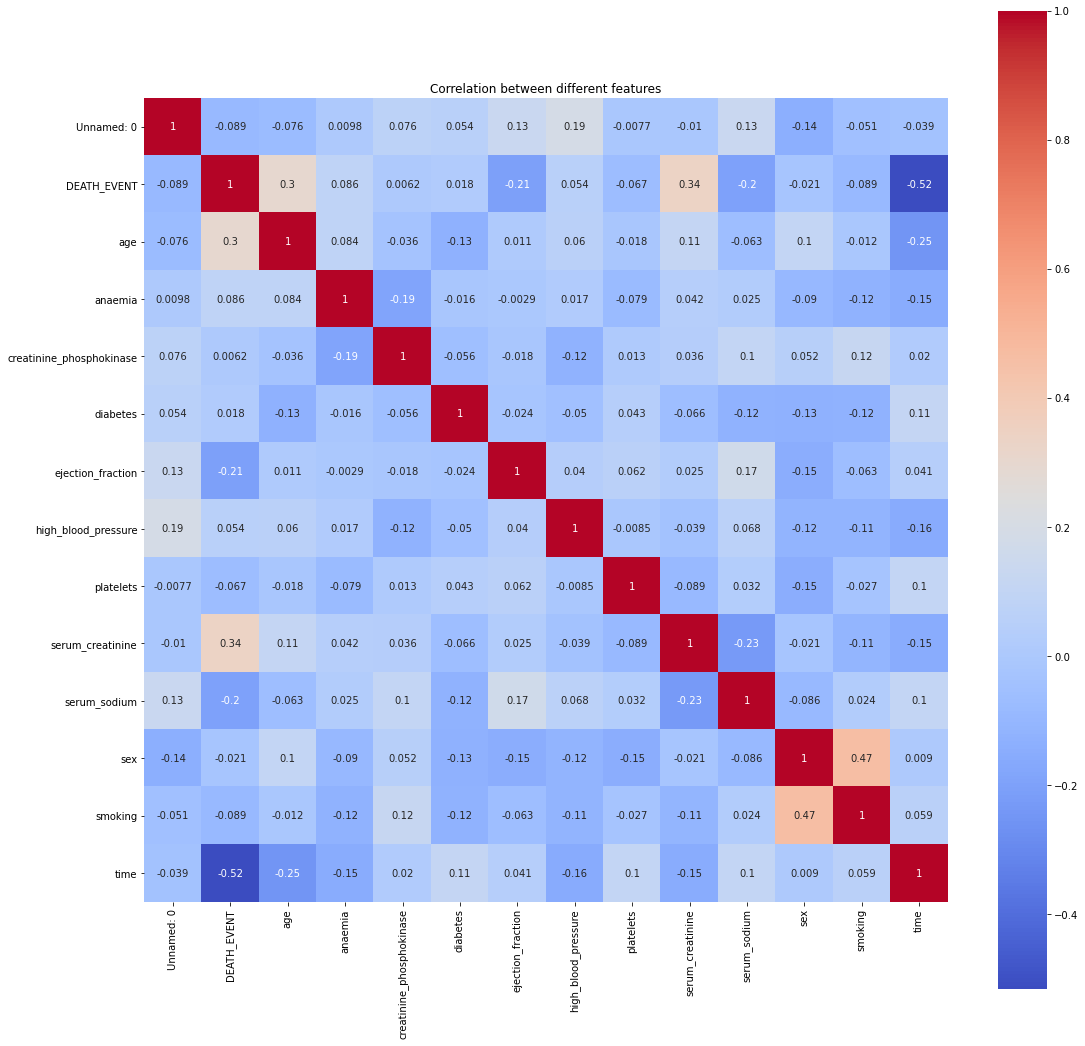

In [170]:
correlation = trdata.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, vmax=1,  cmap='coolwarm', square=True,annot=True)
plt.title('Correlation between different features')
plt.show()

In [171]:
features_utilizzate = ['time','ejection_fraction','serum_creatinine','serum_sodium','age']

X_train = trdata[features_utilizzate]
y_train = trdata.DEATH_EVENT

X_test = tedata[features_utilizzate]
y_test = tedata.DEATH_EVENT

# Label Encoding

<b>age:</b> Per quanto riguarda l'età l'encoding è stato fatto raggruppando i valori in 4 gruppi diversi. Per la scelta dell'intervallo da utilizzare gruppo ho utilizzato la formula:

(MaxAge - MinAge)/4 = (95-40)/4 = 13.75 = 13

Quindi i 4 intervalli partono da 40, e contengono ognuno 14 numeri (estremi inclusi). Inoltre è stato assegnato un gruppo anche ai possibili valori x che potessero ricadere nell'intervallo: x<40 || x>95 in modo evitare problemi di esecuzione e visto che in ogni caso questi sarebbero valori outlier di bassa importanza,
I valori di massimo e minimo sono stati presi dal training set.

<b>ejection_fraction, serum_creatinine, serum_sodium, time:</b> Per quanto riguarda queste quattro feature, la codifica di qualunque di queste abbassava la precisione del classificatore. Dopo aver provato diversi intervalli, studiando anche la distribuzione dei valori e provando anche con intervalli non regolari, si è deciso di non applicare l'encoding a queste feature dato che il risultato non migliorava oppure peggiorava.

In [172]:
trdata.age.describe()

count    191.000000
mean      61.923215
std       12.437301
min       40.000000
25%       52.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [173]:
def codifica_eta(dataset):
    dataset= dataset.copy()
    age = np.asanyarray(dataset['age'])
    for i in range(0, age.size):
        if 40 <= age[i] <= 53:
            age[i] = 0
        elif 54 <= age[i] <= 67:
            age[i] = 1
        elif 68 <= age[i] <= 81:
            age[i] = 2
        elif 82 <= age[i] <= 95:
            age[i] = 3
        else:
            age[i] = 4
            
    dataset['age'] = pd.DataFrame(age)
    return dataset

X_train = codifica_eta(X_train)
X_test = codifica_eta(X_test)

# Modello

Per quanto riguarda il modello di classificazione è stato utilizzato un Decision Tree. Si è deciso di limitare il numero di foglie da costruire visto che altrimenti questo non si ferma e va in overfitting. 

In [174]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

for i in range(2,10):
    model = DecisionTreeClassifier(max_leaf_nodes=6,random_state=8, criterion='entropy')
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print('Accuracy:',accuracy_score(y_test, prediction))

Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666
Accuracy: 0.9166666666666666


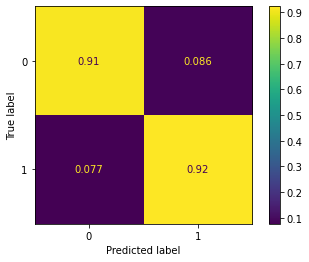

In [175]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test,y_test,normalize='true')